In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Imagine you have collected data for a particular observable. If what you really want is the integral of this data over some range, we need a way to implement the "real-life" integral of some data. 

The most natural way to implement a computational integral is by applying the Riemann definition, that is
\begin{equation}
    \int_a^b f(x)dx \approx \sum_{i=1}^{N}f(x_i)w_{i, i-1}
\end{equation}
where $w_{i, i-1}$ is a weight which in the simplest case represents the width of the interval $[x_{i-1}, x_i]$

This is the actual Riemann integral but we **can not** take the limit because we are limited by the data we have. 

Now the question is which Riemann scheme do we chose to get the most accuracy out? This is known as **quadrature** as we must chose how to construct a quadrilateral over each subinterval $[x_{i-1}, x_{i}]$ in order to get the best result. 

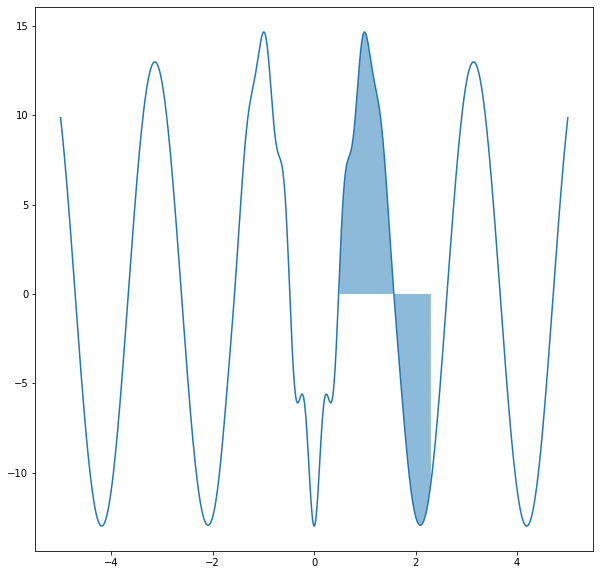

In [2]:
# define the function to integrate

def f(x): 
    return 5*(np.sin(8*x))**2*np.exp(-x*x)-13*np.cos(3*x)

x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(10,10))
plt.plot(x, f(x))


a=0.5
b=2.3 
N=1200
xs = np.linspace(a ,b, N)
plt.fill_between(xs, f(xs), np.zeros_like(xs), alpha=0.5)

plt.show()


In [3]:
def trap(f, a, b, N): 
    x = np.linspace(a, b, N)
    h = np.abs(x[1]-x[0])
    F = f(x) 
    trapezoids = h*(F[1:]+F[0:-1])/2
    print(len(F), len(trapezoids))
    return np.sum(trapezoids)

print(trap(f, 0.5, 2.3, 1200))

1200 1199
2.998428190829019


# Monte-Carlo Integration 

Imagine we instead use random sampling to perform the integral. For example if you wanted to Calculate the area of a circle, you could enclose the circle in a square with known area, and then randomly throw darts into the inclosure. The number of darts that fall into the circle versus the number of darts thrown gives you an estimate of the area of the circle as compared to the area of the square

In [4]:
def get_area(N): 
    r_i = np.random.rand(2,N)
    N_circ = np.sum((r_i[0,:]**2+r_i[1,:]**2) <= 1)
    print(4*N_circ/N)
    
get_area(10000000)

3.1417504


Extending this idea, we can use the Mean Value theorem which states: 
\begin{equation}
    \int_a^b f(x)dx = (b-a)\left< f \right> \approx \frac{b-a}{N}\sum_{i=1}^{N}f(x_i)
\end{equation}
where the $x_i$ are uniformly sampled random numbers. 

As an example, let's calculate $\int_0^{\pi/2} \sin(x) dx = 1$ by this method

In [7]:
N = int(1e6)
xi = np.random.rand(N)*np.pi/2 

I = ((np.pi/2-0)/N)*np.sum(np.sin(xi))
print(I)

0.9997696853629113
